In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sns

import scipy
from scipy.stats import spearmanr

### Train Dataset

In [2]:
df=pd.read_csv("Train_data.csv") 
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [33]:
num_df=df._get_numeric_data()
num_df.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'year', 'duration-min'],
      dtype='object')

In [34]:
no_of_cols=len(num_df.columns)
columns=list(num_df.columns)

In [35]:
spearman_coeffs_dict={col1:{col2:0 for col2 in columns} for col1 in columns}
for col1 in columns:
    for col2 in columns:
        spearman_coeff, p_value = spearmanr(num_df[col1],num_df[col2])
        spearman_coeffs_dict[col1][col2]=spearman_coeff
        
spearman_coeffs_matrix= pd.DataFrame(spearman_coeffs_dict) 
        
spearman_coeffs_matrix   

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
id,1.000000,-0.005156,-0.001384,0.014830,0.000545,0.006317,0.005816,0.007774,-0.000212,0.005690,-0.001332,0.015516,0.005706
acousticness,-0.005156,1.000000,-0.223237,-0.749523,0.171720,-0.016293,0.004445,-0.594261,-0.111683,-0.226805,-0.130948,-0.536437,-0.221048
danceability,-0.001384,-0.223237,1.000000,0.182135,-0.255608,0.027893,-0.134703,0.233436,0.258963,-0.014572,0.463994,0.234180,-0.058832
energy,0.014830,-0.749523,0.182135,1.000000,-0.144952,0.032001,0.079758,0.795655,0.155753,0.243172,0.323890,0.468503,0.162725
instrumentalness,0.000545,0.171720,-0.255608,-0.144952,1.000000,-0.005349,-0.030885,-0.316098,-0.108770,-0.046446,-0.152431,-0.230644,0.115354
key,0.006317,-0.016293,0.027893,0.032001,-0.005349,1.000000,-0.011139,0.026023,0.033068,0.014435,0.030120,0.014373,0.007157
liveness,0.005816,0.004445,-0.134703,0.079758,-0.030885,-0.011139,1.000000,0.029311,0.087146,0.001204,-0.009867,-0.069227,-0.076074
loudness,0.007774,-0.594261,0.233436,0.795655,-0.316098,0.026023,0.029311,1.000000,0.083154,0.194499,0.216213,0.553669,0.114661
speechiness,-0.000212,-0.111683,0.258963,0.155753,-0.108770,0.033068,0.087146,0.083154,1.000000,0.074799,0.113943,0.058074,-0.095652
tempo,0.005690,-0.226805,-0.014572,0.243172,-0.046446,0.014435,0.001204,0.194499,0.074799,1.000000,0.126656,0.127825,0.005905


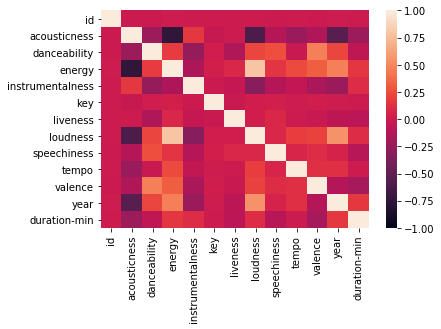

In [36]:
ax = sns.heatmap(spearman_coeffs_matrix,vmin=-1,vmax=1)

### Test Dataset

In [37]:
df=pd.read_csv("Test_data.csv") 
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,4943,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,01-01-2014,0.0644,127.049,0.346,2014,3.8
1,16165,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,01-04-1972,0.0335,129.987,0.830,1972,3.8
2,6774,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,02-06-1998,0.0368,142.483,0.289,1998,4.4
3,9959,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,08-09-1980,0.0418,121.126,0.970,1980,3.9
4,13818,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,17-04-2007,0.0891,165.026,0.882,2007,3.2


In [38]:
num_df=df._get_numeric_data()
num_df.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'year', 'duration-min'],
      dtype='object')

In [39]:
no_of_cols=len(num_df.columns)
columns=list(num_df.columns)

In [40]:
spearman_coeffs_dict={col1:{col2:0 for col2 in columns} for col1 in columns}
for col1 in columns:
    for col2 in columns:
        spearman_coeff, p_value = spearmanr(num_df[col1],num_df[col2])
        spearman_coeffs_dict[col1][col2]=spearman_coeff
        
spearman_coeffs_matrix= pd.DataFrame(spearman_coeffs_dict) 
        
spearman_coeffs_matrix   

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
id,1.000000,0.019965,0.014040,-0.037331,0.006738,0.007171,-0.010616,-0.037599,0.017783,-0.011320,-0.026007,-0.005369,0.006010
acousticness,0.019965,1.000000,-0.206274,-0.755656,0.164795,-0.012930,0.007620,-0.600714,-0.106967,-0.221399,-0.117820,-0.550353,-0.218677
danceability,0.014040,-0.206274,1.000000,0.186637,-0.220214,0.019947,-0.118543,0.235801,0.253434,0.010429,0.490155,0.262567,-0.085465
energy,-0.037331,-0.755656,0.186637,1.000000,-0.156190,0.021846,0.063820,0.802552,0.178010,0.256660,0.309817,0.487176,0.163696
instrumentalness,0.006738,0.164795,-0.220214,-0.156190,1.000000,-0.029687,-0.047928,-0.317107,-0.134927,-0.045209,-0.170247,-0.218381,0.146211
key,0.007171,-0.012930,0.019947,0.021846,-0.029687,1.000000,-0.006734,0.009175,0.044303,0.014551,0.050048,-0.005267,-0.013358
liveness,-0.010616,0.007620,-0.118543,0.063820,-0.047928,-0.006734,1.000000,0.012337,0.107919,-0.023329,-0.027079,-0.062166,-0.054350
loudness,-0.037599,-0.600714,0.235801,0.802552,-0.317107,0.009175,0.012337,1.000000,0.113152,0.193968,0.224730,0.566576,0.096701
speechiness,0.017783,-0.106967,0.253434,0.178010,-0.134927,0.044303,0.107919,0.113152,1.000000,0.091164,0.098746,0.066788,-0.099720
tempo,-0.011320,-0.221399,0.010429,0.256660,-0.045209,0.014551,-0.023329,0.193968,0.091164,1.000000,0.145012,0.143677,0.018063


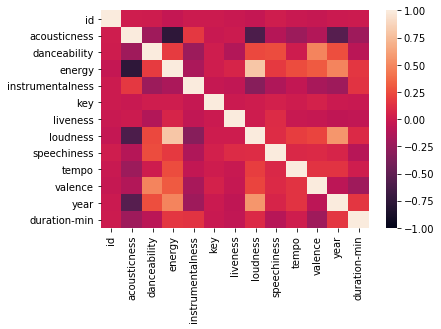

In [41]:
ax = sns.heatmap(spearman_coeffs_matrix,vmin=-1,vmax=1)